In [82]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import chardet


data = pd.read_excel("bank2.xlsx",na_values = ["??","###"])
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,1,basic4y,0,0,0,telephone,may,mon,...,1,999,0,0nexistent,11,93994,364,4857,5191,0
1,57,services,1,highschool,9,0,0,telephone,may,mon,...,1,999,0,0nexistent,11,93994,364,4857,5191,0
2,37,services,1,highschool,0,1,0,telephone,may,mon,...,1,999,0,0nexistent,11,93994,364,4857,5191,0
3,40,admin,1,basic6y,0,0,0,telephone,may,mon,...,1,999,0,0nexistent,11,93994,364,4857,5191,0
4,56,services,1,highschool,0,0,1,telephone,may,mon,...,1,999,0,0nexistent,11,93994,364,4857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,1,professionalcourse,0,1,0,cellular,0v,fri,...,1,999,0,0nexistent,11,94767,508,1028,49636,1
41184,46,bluecollar,1,professionalcourse,0,0,0,cellular,0v,fri,...,1,999,0,0nexistent,11,94767,508,1028,49636,0
41185,56,retired,1,universitydegree,0,1,0,cellular,0v,fri,...,2,999,0,0nexistent,11,94767,508,1028,49636,0
41186,44,technician,1,professionalcourse,0,0,0,cellular,0v,fri,...,1,999,0,0nexistent,11,94767,508,1028,49636,1


Consider:
yes = 1
no = 2

married = 1
single = 2
divorced  = 3

unknown = 9

In [83]:
#checking for null values
data.isnull().sum()

#no null values found

age             0
job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
y               0
dtype: int64

In [84]:
#making a copy of data for analysis
samp = data.copy(deep = True)

samp.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'conspriceidx', 'consconfidx',
       'euribor3m', 'nremployed', 'y'],
      dtype='object')

In [85]:
#cleaning of data
# droping unnecessary columns
samp = samp.drop([ 'education','contact', 'month', 'day_of_week', 'duration', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'conspriceidx',
       'consconfidx', 'euribor3m', 'nremployed'], axis = 1)

samp

,age,job,marital,default,housing,loan,campaign,y
0,56,housemaid,1,0,0,0,1,0
1,57,services,1,9,0,0,1,0
2,37,services,1,0,1,0,1,0
3,40,admin,1,0,0,0,1,0
4,56,services,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
41183,73,retired,1,0,1,0,1,1
41184,46,bluecollar,1,0,0,0,1,0
41185,56,retired,1,0,1,0,2,0
41186,44,technician,1,0,0,0,1,1


In [86]:
#final shape check of data
samp.shape

(41188, 8)

In [88]:
#statistical description of data
samp.describe()

,age,marital,default,housing,loan,campaign,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,1.520346,1.878605,0.740167,0.368020,2.567593,0.112654
std,10.42125,0.763098,3.657599,1.386711,1.401153,2.770014,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,47.00000,2.000000,0.000000,1.000000,0.000000,3.000000,0.000000
max,98.00000,9.000000,9.000000,9.000000,9.000000,56.000000,1.000000


In [73]:
#checking correlation between attributes
samp.corr()

C:\Windows\Temp\ipykernel_20140\4069138520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  samp.corr()


,age,marital,default,housing,loan,campaign,y
age,1.000000,-0.104683,0.165007,-0.001595,-0.002918,0.004594,0.030399
marital,-0.104683,1.000000,-0.096969,0.004032,0.002648,0.004920,0.025520
default,0.165007,-0.096969,1.000000,0.001880,0.006439,0.032999,-0.099301
housing,-0.001595,0.004032,0.001880,1.000000,0.907973,-0.004283,0.001973
loan,-0.002918,0.002648,0.006439,0.907973,1.000000,0.000966,-0.003377
campaign,0.004594,0.004920,0.032999,-0.004283,0.000966,1.000000,-0.066357
y,0.030399,0.025520,-0.099301,0.001973,-0.003377,-0.066357,1.000000


C:\Windows\Temp\ipykernel_20140\2802986411.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(samp.corr(), annot = True)


<Axes: >

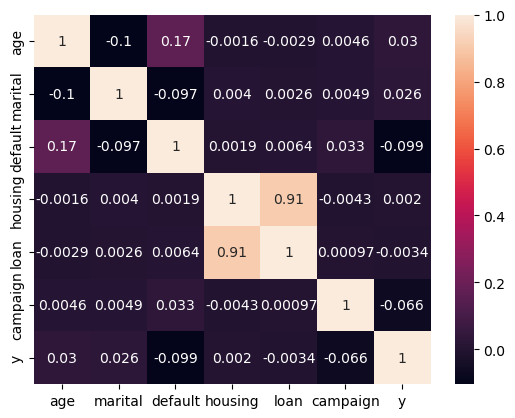

In [59]:
#making heatmap for the above correlation
sns.heatmap(samp.corr(), annot = True)

In [89]:
samp

,age,job,marital,default,housing,loan,campaign,y
0,56,housemaid,1,0,0,0,1,0
1,57,services,1,9,0,0,1,0
2,37,services,1,0,1,0,1,0
3,40,admin,1,0,0,0,1,0
4,56,services,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
41183,73,retired,1,0,1,0,1,1
41184,46,bluecollar,1,0,0,0,1,0
41185,56,retired,1,0,1,0,2,0
41186,44,technician,1,0,0,0,1,1


C:\Windows\Temp\ipykernel_23972\1413527820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'] = X['job'].astype('category').cat.codes


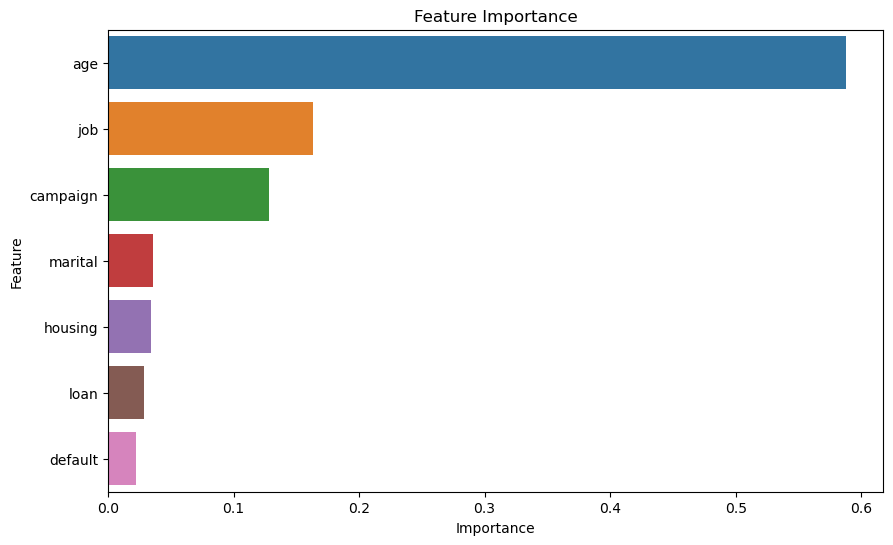

In [90]:
#checking for the most important feature for the term deposit prediction

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming samp is your DataFrame
X = samp[['age', 'job', 'marital', 'default', 'housing', 'loan', 'campaign',]]  # Include all relevant features
y = samp['y']  # Target variable

# Assuming 'job' is categorical and needs encoding
X['job'] = X['job'].astype('category').cat.codes
#X['default'] = X['default'].astype('category').cat.codes


# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_samp = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_samp = feature_importance_samp.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_samp)
plt.title('Feature Importance')
plt.show()


In [ ]:
# Remove integers from the 'job'
samp['campaign'] = samp['campaign'].str.replace('\d', '')

# Display the DataFrame
print(samp["job"])

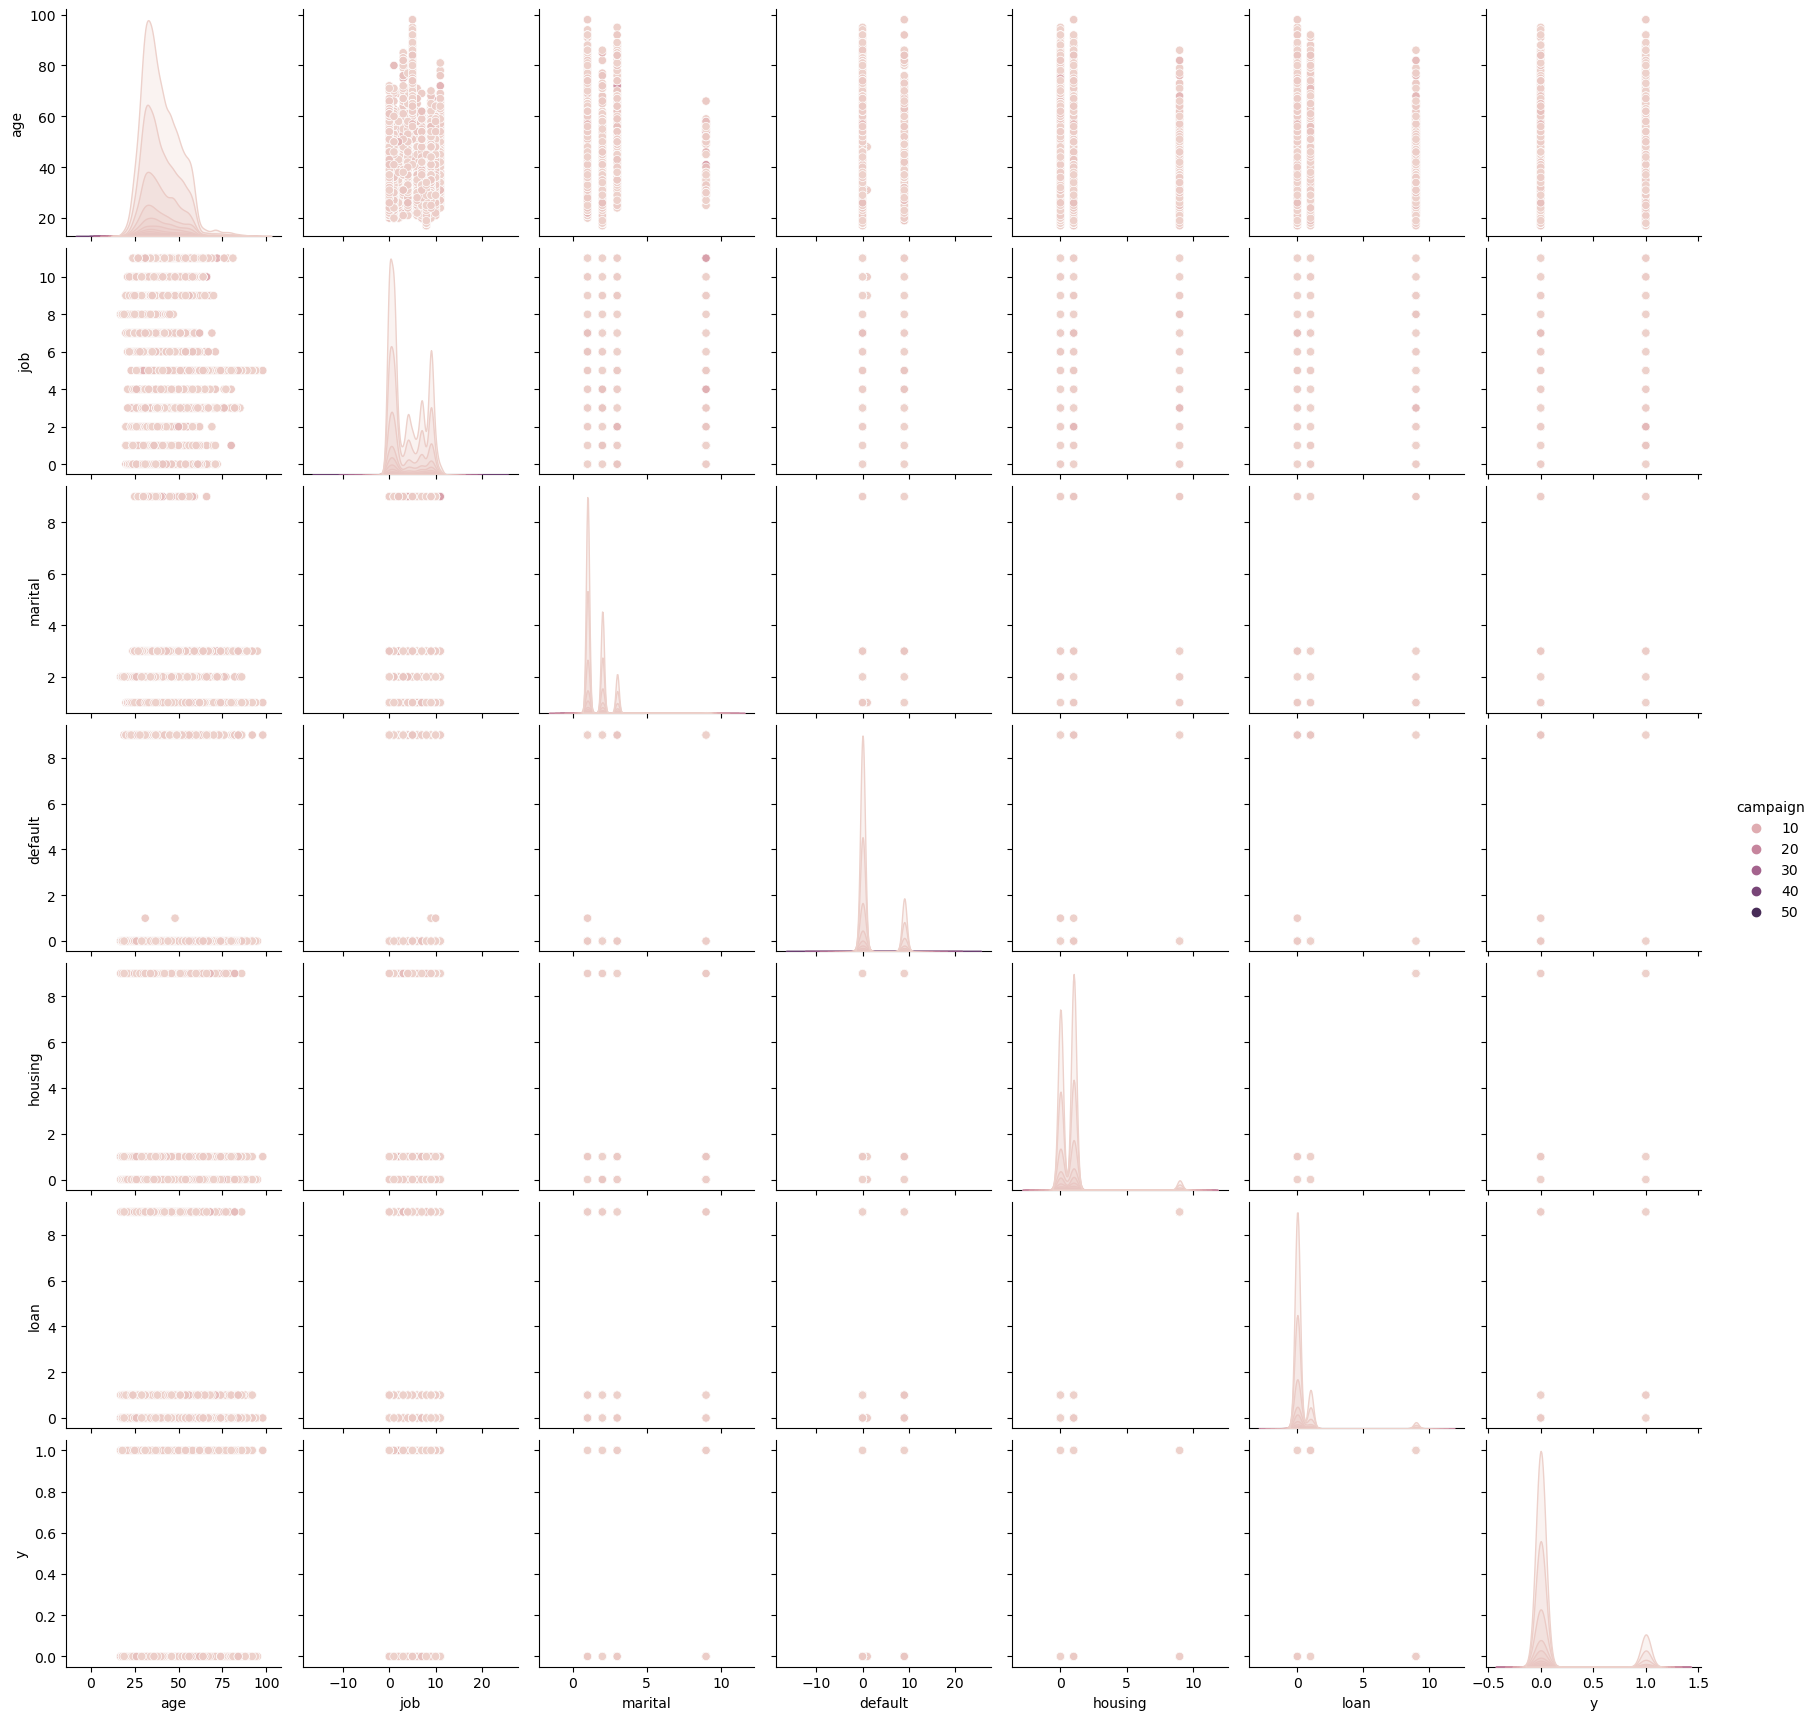

In [117]:
#Obatining dependencies through scatter plots between attributes
#selecting the third imporatant feature
sns.pairplot(samp,kind = "scatter",hue ="campaign")

In [101]:
samp.columns
samp["job"].unique()

array(['housemaid', 'services', 'admin', 'bluecollar', 'technician',
       'retired', 'management', 'unemployed', 'selfemployed', 9,
       'entrepreneur', 'student'], dtype=object)

In [102]:

# Remove integers from the 'job'
samp['job'] = samp['job'].str.replace('\d', '')

# Display the DataFrame
print(samp["job"])

0         housemaid
1          services
2          services
3             admin
4          services
            ...    
41183       retired
41184    bluecollar
41185       retired
41186    technician
41187       retired
Name: job, Length: 41188, dtype: object


C:\Windows\Temp\ipykernel_23972\321975754.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  samp['job'] = samp['job'].str.replace('\d', '')


In [112]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with a categorical column 'Color'
label_encoder = LabelEncoder()
samp["job"] = label_encoder.fit_transform(samp["job"])

In [113]:
#Extracting Independent and dependent Variable  
x= samp[["age","job","campaign"]] 
y= samp["y"]

In [108]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [109]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [110]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm

array([[9139,    0],
       [1158,    0]], dtype=int64)

In [116]:
#obtaining the accuracies of the training and testing model
print("training accuracy :", classifier.score(x_train, y_train))
print("testing accuracy :", classifier.score(x_test, y_test))

training accuracy : 0.8872810851056943
testing accuracy : 0.8875400602117122
